# Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import json
sb.set_style("darkgrid")
import re
import string
import nltk
from sklearn.feature_extraction.text import  CountVectorizer
from nltk.stem.porter import PorterStemmer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Now defining the path for dataset

In [2]:

list_ = []
with open('../input/news-category-dataset/News_Category_Dataset_v2.json') as files:
    for file in files:
        list_.append(json.loads(file))

In [3]:
dataf = pd.DataFrame(list_)
dataf.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


# Exploratory Data Analysis

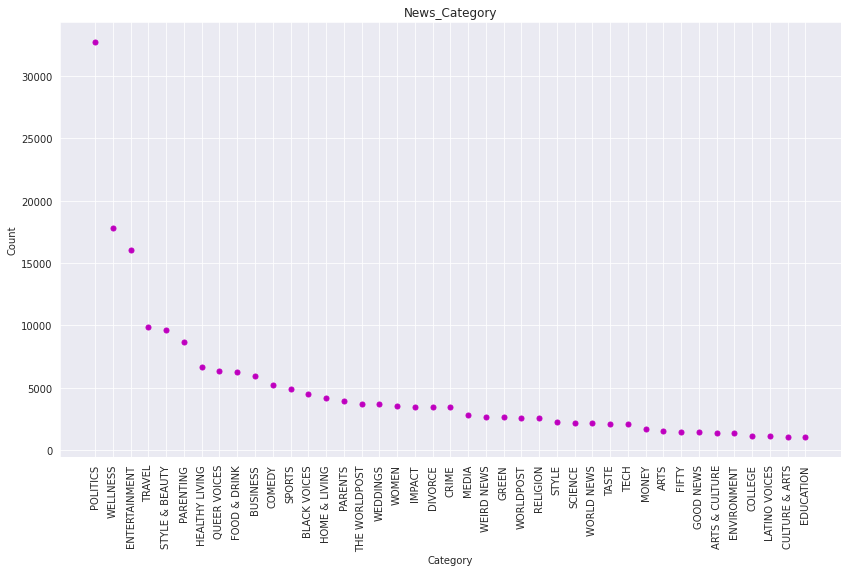

In [4]:
plt.figure(figsize=(14,8))
count = dataf.category.value_counts()
x=count.index
y=count
plt.scatter(x,y,label='News_Category',color='m',s=25,marker='o')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90);
plt.title('News_Category')
plt.legend
plt.show()

In [5]:
dataf.drop(columns=['authors','link','short_description','date'],index=None,axis=None,labels=None, inplace=True,errors='raise')
dataf

,category,headline
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...


# Cleaning data

In [6]:
#reference:https://www.kaggle.com/code/hamzamanssor/news-category-classification
def clean_text(text):
    text = text.lower()                                  # lower-case all characters
    text =  re.sub(r'@\S+', '',text)                     # remove twitter handles
    text =  re.sub(r'http\S+', '',text)                  # remove urls
    text =  re.sub(r'pic.\S+', '',text) 
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')   # remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()            # remove repeated/leading/trailing spaces
    return text

dataf['Text_cl'] = dataf.headline.apply(clean_text)
dataf.head()

,category,headline,Text_cl
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,mass shootings texas last week
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,smith joins diplo nicky jam world cups officia...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,hugh grant marries first time age
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts castrato adam schiff democra...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...


In [7]:
#reference:https://www.kaggle.com/code/hamzamanssor/news-category-classification
vector = CountVectorizer()
dataf_vector = vector.fit_transform(dataf['Text_cl'])
label = dataf['category']

X_train_set, X_test_set, Y_train_set, Y_test_set = train_test_split(dataf_vector, label, test_size=0.21, random_state=40)

In [8]:
#reference : https://github.com/hmahajan99/Text-Classification/blob/master/Text%20Classification%20Using%20Naive%20Bayes.py
clf = MultinomialNB()
clf.fit(X_train_set,Y_train_set)
Y_test_set = clf.predict(X_test_set)
sklearn_score_train = clf.score(X_train_set,Y_train_set)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_set,Y_test_set)
print("Sklearn's score on testing data :",sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test_set, Y_test_set))

Sklearn's score on training data : 0.6075198679044324
Sklearn's score on testing data : 1.0
Classification report for testing data :-
                precision    recall  f1-score   support

          ARTS       1.00      1.00      1.00        32
ARTS & CULTURE       1.00      1.00      1.00        10
  BLACK VOICES       1.00      1.00      1.00       369
      BUSINESS       1.00      1.00      1.00       775
       COLLEGE       1.00      1.00      1.00        14
        COMEDY       1.00      1.00      1.00       454
         CRIME       1.00      1.00      1.00       714
CULTURE & ARTS       1.00      1.00      1.00        32
       DIVORCE       1.00      1.00      1.00       363
     EDUCATION       1.00      1.00      1.00         3
 ENTERTAINMENT       1.00      1.00      1.00      5656
   ENVIRONMENT       1.00      1.00      1.00        13
         FIFTY       1.00      1.00      1.00         1
  FOOD & DRINK       1.00      1.00      1.00      1438
     GOOD NEWS       1.00